# Usage: datasets
Here, we will review the raw/cleaned datasets. `Scenario` class performs data cleaning internally using `JHUData` class and so on, but it is important to review the features and data types before analysing them.

### Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
from pprint import pprint

In [4]:
import covsirphy as cs
cs.__version__

'2.13.3-kappa.new.56.280.420.422.429.449.475.fix.438.441.450'

### Dataset preparation
Download the datasets to "input" directory and load them.

If "input" directory has the datasets, `DataLoader` instance will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically and download the datasets to "input" directory and load them.

In [5]:
# Create DataLoader instance
data_loader = cs.DataLoader("input")

In [6]:
# (Main) The number of cases (JHU style)
jhu_data = data_loader.jhu()
# (Main) Population in each country
population_data = data_loader.population()
# (Main) Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt()
# Linelist of case reports
linelist = data_loader.linelist()
# The number of tests
pcr_data = data_loader.pcr()
# The number of vaccinations
vaccine_data = data_loader.vaccine()
# Population pyramid
pyramid_data = data_loader.pyramid()
# Japan-specific dataset
japan_data = data_loader.japan()

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/



Please set verbose=2 to see the detailed citation list.




Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan


Retrieving linelist from Open COVID-19 Data Working Group repository: https://github.com/beoutbreakprepared/nCoV2019


Retrieving COVID-19 vaccination dataset from https://covid.ourworldindata.org/data/


### The number of cases (JHU style)
The main dataset is that of the number of cases and was saved as `jhu_data`, an instance of `JHUData` class. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

In [7]:
type(jhu_data)

covsirphy.cleaning.jhu_data.JHUData

The dataset will be retrieved from [COVID-19 Data Hub](https://covid19datahub.io/) and [Data folder of CovsirPhy project](https://github.com/lisphilar/covid19-sir/tree/master/data). Description of these projects will be shown as follows.

In [8]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [9]:
# Detailed citation list of COVID-19 Data Hub
# print(data_loader.covid19dh_citation)

In [10]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Tests,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,...,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
370304,2020-12-27,4984,1137.0,1107,14,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,60.19
370305,2020-12-28,4997,1141.0,1111,14,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,60.19
370306,2020-12-29,5026,1148.0,1115,14,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,60.19
370307,2020-12-30,5028,1148.0,1124,14,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,60.19
370308,2020-12-31,5028,1148.0,1124,14,107808.0,COL,Vichada,Colombia,3,...,1,3,1,1,1,4,2,2,2,60.19


In [11]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
14191,2020-12-27,Japan,-,217312,31503,3213,182596
14192,2020-12-28,Japan,-,220236,32322,3252,184662
14193,2020-12-29,Japan,-,223120,32868,3306,186946
14194,2020-12-30,Japan,-,226596,33781,3349,189466
14195,2020-12-31,Japan,-,230304,35439,3414,191451


In [12]:
jhu_data.cleaned().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366984 entries, 0 to 14195
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       366984 non-null  datetime64[ns]
 1   Country    366984 non-null  category      
 2   Province   366984 non-null  category      
 3   Confirmed  366984 non-null  int64         
 4   Infected   366984 non-null  int64         
 5   Fatal      366984 non-null  int64         
 6   Recovered  366984 non-null  int64         
dtypes: category(2), datetime64[ns](1), int64(4)
memory usage: 18.3 MB


Total number of cases in all countries with `JHUData.total()` method.

In [13]:
# Calculate total values
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-12-27,80878698,27121799,1769102,51987797,0.021874,0.642787,0.032909
2020-12-28,81380944,27347025,1777679,52256240,0.021844,0.642119,0.032899
2020-12-29,82036575,27667456,1791665,52577454,0.021840,0.640903,0.032954
2020-12-30,82739904,28004754,1805002,52930148,0.021815,0.639717,0.032977
2020-12-31,82743806,28006578,1805067,52932161,0.021815,0.639711,0.032977


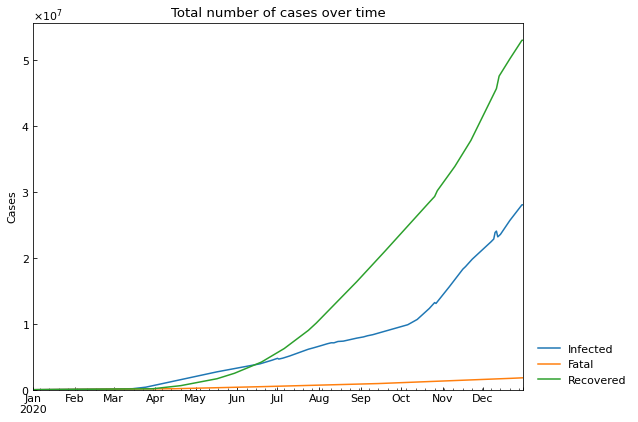

In [14]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

In [15]:
# Statistics of rate values in all countries
total_df.loc[:, total_df.columns.str.contains("per")].describe().T

,count,mean,std,min,25%,50%,75%,max
Fatal per Confirmed,365.0,0.038304,0.017300,0.00000,0.024854,0.034061,0.049115,0.074103
Recovered per Confirmed,365.0,0.432148,0.251650,0.00132,0.200600,0.532886,0.647441,1.000000
Fatal per (Fatal or Recovered),365.0,0.201342,0.268445,0.00000,0.039911,0.075061,0.221680,0.942029


We can create a subset for a country using `JHUData.subset()` method.

In [16]:
# Subset for a country
df, _ = jhu_data.records("Japan")
df.tail()
# We can use ISO3 code etc.
# df, _ = jhu_data.records("JPN")
# df.tail()

,Date,Confirmed,Infected,Fatal,Recovered
325,2020-12-27,217312,31503,3213,182596
326,2020-12-28,220236,32322,3252,184662
327,2020-12-29,223120,32868,3306,186946
328,2020-12-30,226596,33781,3349,189466
329,2020-12-31,230304,35439,3414,191451


Province ("prefecture" for Japan) name can be specified.

In [17]:
df, _ = jhu_data.records("Japan", province="Tokyo")
df.tail()

,Date,Confirmed,Infected,Fatal,Recovered
266,2020-12-26,55851,10845,607,44399
267,2020-12-27,56559,10953,607,44999
268,2020-12-28,57040,10838,613,45589
269,2020-12-29,57896,11068,618,46210
270,2020-12-30,58840,11528,622,46690


In [18]:
# Countries we can select
pprint(jhu_data.countries(), compact=True)

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Costa Atlantica', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Grand Princess',
 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
 'Haiti', 'Holy See', 'Honduras', 'Hungary', 

### Linelist of case reports
The number of cases is important, but linelist of case reports will helpful to understand the situation deeply. Linelist data was saved as `linelist`, an instance of `LinelistData` class. This dataset is from [Open COVID-19 Data Working Group](https://github.com/beoutbreakprepared/nCoV2019).

In [19]:
type(linelist)

covsirphy.cleaning.linelist.LinelistData

In [20]:
# Citation
print(linelist.citation)

Xu, B., Gutierrez, B., Mekaru, S. et al. Epidemiological data from the COVID-19 outbreak, real-time case information. Sci Data 7, 106 (2020). https://doi.org/10.1038/s41597-020-0448-0


In [21]:
# Raw dataset
linelist.raw.tail()

,age,sex,province,country,date_admission_hospital,date_confirmation,symptoms,chronic_disease,outcome,date_death_or_discharge
2676307,52,female,Lima,Peru,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676308,52,female,Lima,Peru,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676309,52,male,Callao,Peru,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676310,52,male,Lima,Peru,NaN,17.05.2020,NaN,NaN,NaN,NaN
2676311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Cleaned dataset
linelist.cleaned().tail()

,Country,Province,Hospitalized_date,Confirmation_date,Outcome_date,Confirmed,Infected,Recovered,Fatal,Symptoms,Chronic_disease,Age,Sex
2676306,Peru,Coronel Portillo,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676307,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676308,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,female
2676309,Peru,Callao,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,male
2676310,Peru,Lima,NaT,2020-05-17,NaT,True,False,False,False,NaN,NaN,52.0,male


In [23]:
# Subset for specified area
linelist.subset("Japan", province="Tokyo").tail()

,Hospitalized_date,Confirmation_date,Outcome_date,Confirmed,Infected,Recovered,Fatal,Symptoms,Chronic_disease,Age,Sex
107,NaT,2020-01-30,NaT,True,False,False,False,NaN,NaN,NaN,female
108,NaT,2020-01-24,NaT,True,False,True,False,fever:pneumonia:sore throat,NaN,40.0,male
109,2020-10-01,2020-01-15,2020-01-15,True,False,True,False,cough:fever:sore throat,NaN,30.0,male
110,NaT,2020-01-25,NaT,True,False,False,False,cough:fever,NaN,NaN,female
111,NaT,2020-01-26,NaT,True,False,False,False,fever:joint pain:pneumonia,NaN,40.0,male


In [24]:
# Subset for outcome ("Recovered" or "Fatal")
linelist.closed(outcome="Recovered").tail()

,Country,Province,Hospitalized_date,Confirmation_date,Recovered_date,Symptoms,Chronic_disease,Age,Sex
272,Singapore,-,2020-02-02,2020-02-06,2020-02-17,NaN,NaN,39.0,female
273,Malaysia,Johor,NaT,2020-01-25,2020-02-08,cough:fever,NaN,40.0,male
274,China,Gansu,2020-07-02,2020-02-08,2020-02-17,diarrhea,NaN,1.0,female
275,Canada,Ontario,NaT,2020-01-25,2020-01-31,NaN,hypertension,NaN,male
276,Canada,Ontario,NaT,2020-01-31,2020-02-19,NaN,NaN,NaN,female


As the median value of the period from confirmation to recovery, we can calculate recovery period.

In [25]:
# Recovery period (integer) [days]
linelist.recovery_period()

12

### Population in each country
Population values are necessary to calculate the number of susceptible people. Susceptible is a variable of SIR-derived models. This dataset was saved as `population_data`, an instance of `PopulationData` class.

In [26]:
type(population_data)

covsirphy.cleaning.population.PopulationData

In [27]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [28]:
# Raw data (the same as jhu_data)
# population_data.raw.tail()

In [29]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
318109,COL,Colombia,Vichada,2020-12-27,107808
318110,COL,Colombia,Vichada,2020-12-28,107808
318111,COL,Colombia,Vichada,2020-12-29,107808
318112,COL,Colombia,Vichada,2020-12-30,107808
318113,COL,Colombia,Vichada,2020-12-31,107808


We will get the population values with `PopulationData.value()`.

In [30]:
# In a country
population_data.value("Japan", province=None)
# In a country with ISO3 code
# population_data.value("JPN", province=None)
# In a province (prefecture)
# population_data.value("Japan", province="Tokyo")

126529100

We can update the population values.

In [31]:
# Before
population_before = population_data.value("Japan", province="Tokyo")
print(f"Before: {population_before}")
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_after = population_data.value("Japan", province="Tokyo")
print(f" After: {population_after}")

Before: 13942856
 After: 14002973


### Government Response Tracker (OxCGRT)
Government responses are tracked with [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker). Because government responses and activities of persons change the parameter values of SIR-derived models, this dataset is significant when we try to forcast the number of cases.  
With `DataLoader` class, the dataset was retrieved via [COVID-19 Data Hub](https://covid19datahub.io/) and saved as `oxcgrt_data`, an instance of `OxCGRTData` class.

In [32]:
type(oxcgrt_data)

covsirphy.cleaning.oxcgrt.OxCGRTData

In [33]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


In [34]:
# Raw data (the same as jhu_data)
# oxcgrt_data.raw.tail()

In [35]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
370304,2020-12-27,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
370305,2020-12-28,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
370306,2020-12-29,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
370307,2020-12-30,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19
370308,2020-12-31,Colombia,COL,3,1,1,3,1,1,1,4,2,2,2,60.19


In [36]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()
# We can use ISO3 codes
# oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
361,2020-12-27,1,1,1,0,1,1,1,3,2,3,2,53.7
362,2020-12-28,1,1,1,0,1,1,1,3,2,3,2,53.7
363,2020-12-29,1,1,1,0,1,1,1,3,2,3,2,53.7
364,2020-12-30,1,1,1,0,1,1,1,3,2,3,2,53.7
365,2020-12-31,1,1,1,0,1,1,1,3,2,3,2,53.7


### The number of tests
The number of tests is also key information to understand the situation.
This dataset was saved as `pcr_data`, an instance of `PCRData` class.

In [37]:
type(pcr_data)

covsirphy.cleaning.pcr_data.PCRData

In [38]:
# Description/citation
print(pcr_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https://doi.org/10.1038/s41597-020-00688-8
Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [39]:
# Raw data (the same as jhu_data)
# pcr_data.raw.tail()

In [40]:
# Cleaned data
pcr_data.cleaned().tail()

,Date,Country,Province,Tests,Confirmed
14191,2020-12-27,Japan,-,4711851,217312
14192,2020-12-28,Japan,-,4725966,220236
14193,2020-12-29,Japan,-,4802239,223120
14194,2020-12-30,Japan,-,4829069,226596
14195,2020-12-31,Japan,-,4851937,230304


In [41]:
# Subset for a country
pcr_data.subset("Japan").tail()
# We can use ISO3 codes
# pcr_data.subset("JPN").tail()

,Date,Tests,Confirmed


Under the assumption that all tests were PCR test, we can calculate the positive rate of PCR tests as "the number of confirmed cases per the number of tests".

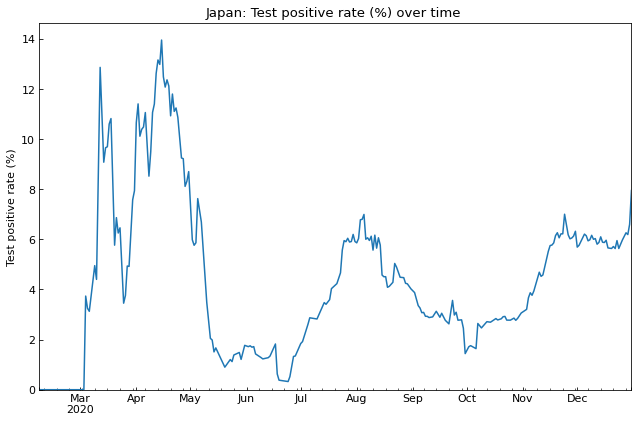

In [42]:
# Positive rate in Japan
_ = pcr_data.positive_rate("Japan")

### The number of vaccinations
The number of vaccinations is a key factor to end the outbreak as soon as possible. This dataset was saved as `vaccine_data`, an instance of `VaccineData` class.

In [43]:
# The number of vaccinations
type(vaccine_data)

covsirphy.cleaning.vaccine_data.VaccineData

In [44]:
# Description/citation
print(vaccine_data.citation)

Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https://doi.org/10.1038/s41597-020-00688-8


In [45]:
# Raw data
# vaccine_data.raw.tail()

In [46]:
# Cleaned data
vaccine_data.cleaned().tail()

,Date,Country,Product,Vaccinations
89,2020-12-26,United States,"Moderna, Pfizer/BioNTech",1944585
90,2020-12-28,United States,"Moderna, Pfizer/BioNTech",2127143
91,2020-12-30,United States,"Moderna, Pfizer/BioNTech",2589125
92,2020-12-13,Wales,Pfizer/BioNTech,7852
93,2020-12-20,Wales,Pfizer/BioNTech,22595


In [47]:
# Registered countries
vaccine_data.countries()

['Austria',
 'Bahrain',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Costa Rica',
 'Croatia',
 'Denmark',
 'England',
 'Estonia',
 'Germany',
 'Greece',
 'Hungary',
 'Israel',
 'Italy',
 'Kuwait',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Mexico',
 'Northern Ireland',
 'Oman',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Scotland',
 'United Kingdom',
 'United States',
 'Wales']

In [48]:
# Subset for a country
vaccine_data.subset("United Kingdom").tail()
# We can use ISO3 codes
# pcr_data.subset("GBR").tail()

,Date,Vaccinations
0,2020-12-20,616933
1,2020-12-21,616933
2,2020-12-22,616933
3,2020-12-23,616933
4,2020-12-24,800000


### Population pyramid
With population pyramid, we can divide the population to sub-groups. This will be useful when we analyse the meaning of parameters. For example, how many days go out is different between the sub-groups.
This dataset was saved as `pyramid_data`, an instance of `PopulationPyramidData` class.

In [49]:
# Population pyramid
type(pyramid_data)

covsirphy.cleaning.pyramid.PopulationPyramidData

In [50]:
# Description/citation
print(pyramid_data.citation)

World Bank Group (2020), World Bank Open Data, https://data.worldbank.org/


In [51]:
# Subset will retrieved from the server when set
pyramid_data.subset("Japan").tail()

Retrieving population pyramid dataset (Japan) from https://data.worldbank.org/


,Age,Population,Per_total
113,118,255035,0.002174
114,119,255035,0.002174
115,120,255035,0.002174
116,121,255035,0.002174
117,122,255035,0.002174


### Japan-specific dataset
This includes the number of confirmed/infected/fatal/recovered/tests/moderate/severe cases at country/prefecture level and metadata of each prefecture.
This dataset was saved as `japan_data`, an instance of `JapanData` class.

In [52]:
# Japan-specific dataset
type(japan_data)

covsirphy.cleaning.japan_data.JapanData

In [53]:
# Description/citation
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan


In [54]:
# Cleaned dataset
japan_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered,Tests,Moderate,Severe
14191,2020-12-27,Japan,-,217312,31503,3213,182596,4711851,29846,659
14192,2020-12-28,Japan,-,220236,32322,3252,184662,4725966,30583,661
14193,2020-12-29,Japan,-,223120,32868,3306,186946,4802239,31169,675
14194,2020-12-30,Japan,-,226596,33781,3349,189466,4829069,31961,668
14195,2020-12-31,Japan,-,230304,35439,3414,191451,4851937,33485,681


In [55]:
# Metadata
japan_data.meta().tail()

Retrieving Metadata of Japan dataset from https://github.com/lisphilar/covid19-sir/data/japan


,Prefecture,Admin_Capital,Admin_Region,Admin_Num,Area_Habitable,Area_Total,Clinic_bed_Care,Clinic_bed_Total,Hospital_bed_Care,Hospital_bed_Specific,Hospital_bed_Total,Hospital_bed_Tuberculosis,Hospital_bed_Type-I,Hospital_bed_Type-II,Population_Female,Population_Male,Population_Total,Location_Latitude,Location_Longitude
42,Kumamoto,Kumamoto,Kyushu,43,2796,7409,497,4628,8340,0,33710,95,2,46,933,833,1765,32.790513,130.742388
43,Oita,Oita,Kyushu,44,1799,6341,269,3561,2618,0,19834,50,2,38,607,546,1152,33.238391,131.612658
44,Miyazaki,Miyazaki,Kyushu,45,1850,7735,206,2357,3682,0,18769,33,1,30,577,512,1089,31.911188,131.423873
45,Kagoshima,Kagoshima,Kyushu,46,3313,9187,652,4827,7750,0,32651,98,1,44,863,763,1626,31.560052,130.557745
46,Okinawa,Naha,Okinawa,47,1169,2281,83,914,3804,0,18710,47,4,20,734,709,1443,26.211761,127.681119
